In [1]:
import json
import os
import sys
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload

%autoreload 2


In [2]:
import end_to_end_profiles as e2e
import profiler
import single_model_profiles as sm_profs

In [4]:
pipeline_three_df = profiler.load_pipeline_three_systemx()

No profile found for alexnet: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 32.0
No profile found for res50: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 32.0
No profile found for alexnet: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 32.0
No profile found for res50: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 32.0
No profile found for alexnet: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 32.0
No profile found for res50: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 32.0
No profile found for alexnet: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 32.0
No profile found for res50: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 32.0
No profile found for alexnet: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 32.0
No profile found for res50: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 32.0
No profile found for alexnet: 1 gpus, 1 cpus, batc

In [5]:
pipeline_one_df = profiler.load_pipeline_one_systemx()

No profile found for tf-resnet-feats: 1 gpus, 1 cpus, batch size 64. Approximating with batch size 62.38461538461539
No profile found for tf-resnet-feats: 1 gpus, 1 cpus, batch size 64. Approximating with batch size 62.38461538461539
No profile found for tf-resnet-feats: 1 gpus, 1 cpus, batch size 64. Approximating with batch size 62.38461538461539
No profile found for tf-resnet-feats: 1 gpus, 1 cpus, batch size 64. Approximating with batch size 62.38461538461539
No profile found for tf-resnet-feats: 1 gpus, 1 cpus, batch size 64. Approximating with batch size 62.38461538461539
No profile found for tf-resnet-feats: 1 gpus, 1 cpus, batch size 64. Approximating with batch size 62.38461538461539
No profile found for tf-resnet-feats: 1 gpus, 1 cpus, batch size 64. Approximating with batch size 62.38461538461539
No profile found for tf-resnet-feats: 1 gpus, 1 cpus, batch size 64. Approximating with batch size 62.38461538461539
No profile found for tf-resnet-feats: 1 gpus, 1 cpus, batch size

In [ ]:
# for df in dfs:
ax = sns.boxplot(x="cost", y="latency", hue="name", orient="v",
                 data=pipeline_one_df)

In [ ]:
plt.show()

In [ ]:
ax.legend(loc=1)

In [ ]:
ax2 = sns.pointplot(x="cost", y="mean_throughput", hue="name", data=pipeline_one_df)

In [ ]:

plt.show()

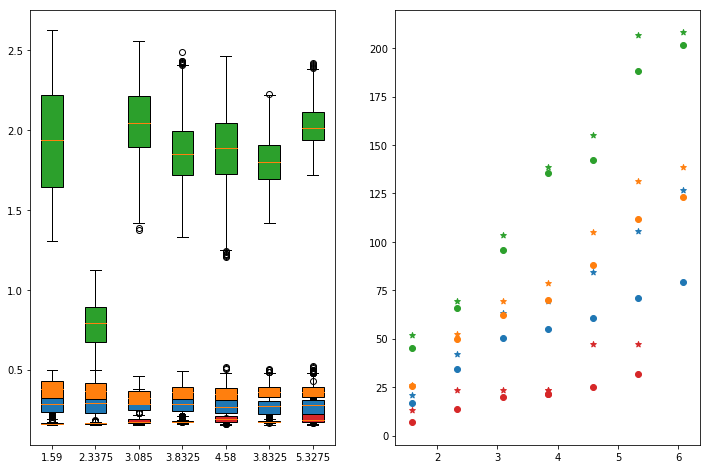

In [6]:
plt.clf()
fig, (ax_lat, ax_thru) = plt.subplots(ncols=2, nrows=1)
fig.set_size_inches(12,8)
colors = sns.color_palette(n_colors=8)
i = 0
for title, group in pipeline_one_df.groupby("name"):
    box = ax_lat.boxplot(x=group["latency"], labels=group["cost"], patch_artist=True)
    for patch in box["boxes"]:
        patch.set_facecolor(colors[i])
    ax_lat.plot(x=group["cost"], y=group["estimated_latency"], linestyle="dashed", color=colors[i])
    ax_thru.scatter(x=group["cost"], y=group["mean_throughput"], c=colors[i], marker="o", label=title)
    ax_thru.scatter(x=group["cost"], y=group["estimated_thru"], c=colors[i], marker="*")

    i += 1
plt.show()

In [ ]:
pipeline_one_df.columns

In [ ]:
pipeline_one_df

In [ ]:
pipeline_three_df